In [1]:
using Gillespie
using Plots
using LinearAlgebra

Gillespie.verify_working()

The package has been imported correctly, version 0.2b


true

In [7]:
# Model parameters.
ωA = 1.
ωB = 1.
ΩA = 0.
ΩB = 1.
γ = 0.1
g = 0.1

# Initial state.
ψ0_A = complex(float([1 ; 0]))
ψ0_B = complex(float([1 ; 0]))
ψ0 = kron(ψ0_A, ψ0_B)

# Simulation parameters.
t_final = 50.
dt = 0.01
number_trajectories = 10000

# Operators.
σx = complex(float([0 1 ; 1 0]))
σy = complex(float([0 -1im ; 1im 0]))
σz = complex(float([1 0 ; 0 -1]))
ide = complex(float([1 0 ; 0 1]))
σp = (σx + 1im * σy)/2
σ = σp'
# Tensorized versions.
σ_A = kron(σ, ide)
σ_B = kron(ide, σ)
σx_A = kron(σx, ide)
σx_B = kron(ide, σx)
σz_A = kron(σz, ide)
σz_B = kron(ide, σz)

# Hamiltonian.
H = ωA * σz_A + ωB * σz_B + ΩA * σx_A + ΩB * σx_B + g * (σ_A * σ_B' + σ_A' * σ_B)

# Jump operator.
M = sqrt(γ) * σ_B

# The jump operators have to be passed as lists.
M_l = [M];

# Number operator on A and B.
num_op = [0 0 ; 0 1]
num_op_A = kron(num_op, ide)
num_op_B = kron(ide, num_op)

# Also the jump operators have to be passed as lists.
E_l = [num_op_A, num_op_B]

2-element Vector{Matrix{ComplexF64}}:
 [0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im]
 [0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im]

In [8]:
results = Gillespie.compute_expectation_values_at_times(H, M_l, E_l, ψ0, t_final, dt, number_trajectories, false);

Gillespie evolution...   6%|█▋                           |  ETA: 0:00:17

Gillespie evolution...  13%|███▋                         |  ETA: 0:00:15

Gillespie evolution...  19%|█████▌                       |  ETA: 0:00:13

Gillespie evolution...  26%|███████▌                     |  ETA: 0:00:12

Gillespie evolution...  33%|█████████▋                   |  ETA: 0:00:10

Gillespie evolution...  40%|███████████▋                 |  ETA: 0:00:09

Gillespie evolution...  47%|█████████████▋               |  ETA: 0:00:08

Gillespie evolution...  54%|███████████████▊             |  ETA: 0:00:07

Gillespie evolution...  61%|█████████████████▊           |  ETA: 0:00:06

Gillespie evolution...  68%|███████████████████▊         |  ETA: 0:00:05

Gillespie evolution...  75%|█████████████████████▊       |  ETA: 0:00:04

Gillespie evolution...  82%|███████████████████████▉     |  ETA: 0:00:03

Gillespie evolution...  89%|█████████████████████████▉   |  ETA: 0:00:02

Gillespie evolution...  97%|████████████████████████████ |  ETA: 0:00:01

Gillespie evolution... 100%|█████████████████████████████| Time: 0:00:14


Filling in the gaps...   2%|▋                            |  ETA: 0:00:43

Filling in the gaps...   5%|█▍                           |  ETA: 0:00:41

Filling in the gaps...   7%|██                           |  ETA: 0:00:40

Filling in the gaps...   9%|██▊                          |  ETA: 0:00:40

Filling in the gaps...  12%|███▍                         |  ETA: 0:00:39

Filling in the gaps...  14%|████                         |  ETA: 0:00:37

Filling in the gaps...  16%|████▊                        |  ETA: 0:00:36

Filling in the gaps...  19%|█████▍                       |  ETA: 0:00:36

Filling in the gaps...  21%|██████                       |  ETA: 0:00:36

Filling in the gaps...  23%|██████▋                      |  ETA: 0:00:36

Filling in the gaps...  25%|███████▎                     |  ETA: 0:00:35

Filling in the gaps...  27%|███████▉                     |  ETA: 0:00:33

Filling in the gaps...  29%|████████▌                    |  ETA: 0:00:32

Filling in the gaps...  32%|█████████▎                   |  ETA: 0:00:31

Filling in the gaps...  34%|█████████▉                   |  ETA: 0:00:30

Filling in the gaps...  36%|██████████▌                  |  ETA: 0:00:29

Filling in the gaps...  38%|███████████▏                 |  ETA: 0:00:28

Filling in the gaps...  41%|███████████▊                 |  ETA: 0:00:27

Filling in the gaps...  43%|████████████▍                |  ETA: 0:00:26

Filling in the gaps...  45%|█████████████                |  ETA: 0:00:25

Filling in the gaps...  47%|█████████████▋               |  ETA: 0:00:24

Filling in the gaps...  49%|██████████████▎              |  ETA: 0:00:23

Filling in the gaps...  51%|██████████████▉              |  ETA: 0:00:22

Filling in the gaps...  54%|███████████████▌             |  ETA: 0:00:21

Filling in the gaps...  56%|████████████████▎            |  ETA: 0:00:20

Filling in the gaps...  58%|████████████████▉            |  ETA: 0:00:19

Filling in the gaps...  60%|█████████████████▌           |  ETA: 0:00:18

Filling in the gaps...  62%|██████████████████▏          |  ETA: 0:00:17

Filling in the gaps...  65%|██████████████████▊          |  ETA: 0:00:16

Filling in the gaps...  67%|███████████████████▍         |  ETA: 0:00:15

Filling in the gaps...  69%|████████████████████▏        |  ETA: 0:00:14

Filling in the gaps...  71%|████████████████████▊        |  ETA: 0:00:13

Filling in the gaps...  73%|█████████████████████▎       |  ETA: 0:00:12

Filling in the gaps...  76%|█████████████████████▉       |  ETA: 0:00:11

Filling in the gaps...  78%|██████████████████████▌      |  ETA: 0:00:10

Filling in the gaps...  80%|███████████████████████▎     |  ETA: 0:00:09

Filling in the gaps...  82%|███████████████████████▉     |  ETA: 0:00:08

Filling in the gaps...  84%|████████████████████████▍    |  ETA: 0:00:07

Filling in the gaps...  86%|█████████████████████████▏   |  ETA: 0:00:06

Filling in the gaps...  89%|█████████████████████████▊   |  ETA: 0:00:05

Filling in the gaps...  91%|██████████████████████████▍  |  ETA: 0:00:04

Filling in the gaps...  93%|███████████████████████████  |  ETA: 0:00:03

Filling in the gaps...  95%|███████████████████████████▋ |  ETA: 0:00:02

Filling in the gaps...  97%|████████████████████████████▎|  ETA: 0:00:01

Filling in the gaps... 100%|████████████████████████████▉|  ETA: 0:00:00

Filling in the gaps... 100%|█████████████████████████████| Time: 0:00:46


-> Truncation error given by norm of latest Qs matrix: 0.011999073627007282


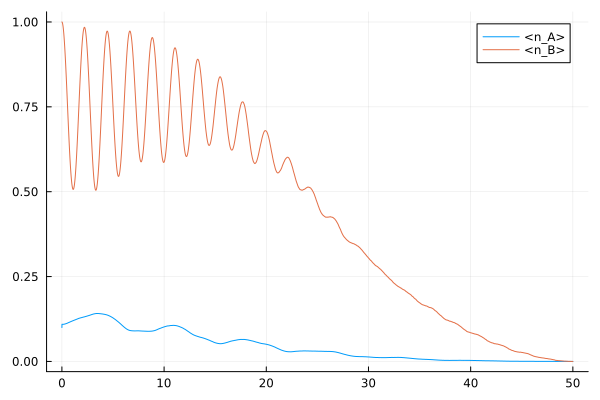

In [9]:
t_range = 0:dt:t_final
v_ave_E1 = zeros(length(t_range))
v_ave_E2 = zeros(length(t_range))

for n_traj in 1:number_trajectories
    for n_t in eachindex(t_range)
        exp_E1 = results[n_traj][1][n_t]
        exp_E2 = results[n_traj][2][n_t]

        v_ave_E1[n_t] += exp_E1 / number_trajectories
        v_ave_E2[n_t] += exp_E2 / number_trajectories
    end
end

plot(t_range, v_ave_E1, label="<n_A>")
display(plot!(t_range, v_ave_E2, label="<n_B>"))